<a href="https://colab.research.google.com/github/fastabyq/Tugas-DataScience-BengkelKoding/blob/main/Fasta_progres_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tampilkan semua kolom
pd.set_option('display.max_columns', None)

In [ ]:
# Load Data
df = pd.read_csv('/content/ObesityDataSet.csv')

In [ ]:
# Informasi Awal Dataset
print("Jumlah baris dan kolom:", df.shape)
print("\nTipe data tiap kolom:")
print(df.dtypes)

Jumlah baris dan kolom: (2111, 17)

Tipe data tiap kolom:
Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object


In [ ]:
# Lihat 5 baris pertama
print("\n5 baris pertama:")
print(df.head())


5 baris pertama:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  

In [ ]:
# Statistik Deskriptif
print("\nDeskripsi Statistik:")
display(df.describe(include='all'))


Deskripsi Statistik:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [ ]:
# Cek Missing Values
print("\nMissing Values per Kolom:")
print(df.isnull().sum())


Missing Values per Kolom:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64


In [ ]:
# Cek duplikat
print("\nJumlah Duplikat:")
print(df.duplicated().sum())


Jumlah Duplikat:
18


In [ ]:
# Cek Nilai Unik
print("\nNilai unik per kolom:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")


Nilai unik per kolom:
Age: 1394
Gender: 3
Height: 1562
Weight: 1518
CALC: 5
FAVC: 3
FCVC: 808
NCP: 637
SCC: 3
SMOKE: 3
CH2O: 1263
family_history_with_overweight: 3
FAF: 1186
TUE: 1130
CAEC: 5
MTRANS: 6
NObeyesdad: 7


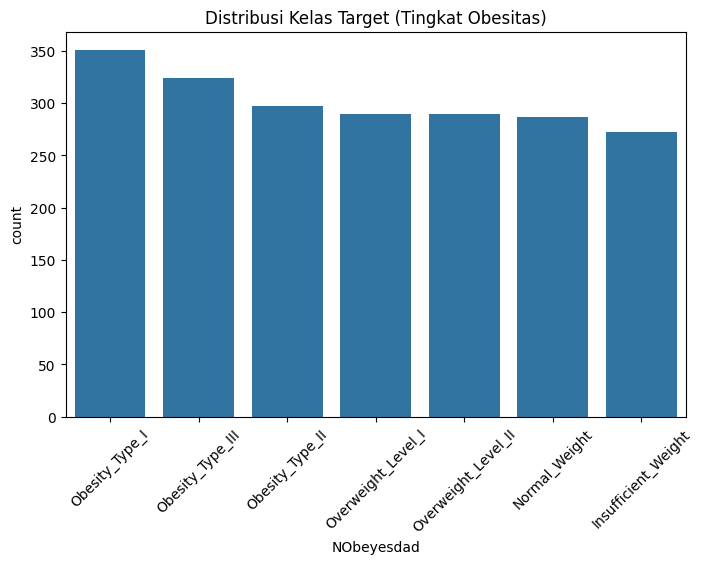

In [ ]:
# Cek keseimbangan target kelas
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="NObeyesdad", order=df["NObeyesdad"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribusi Kelas Target (Tingkat Obesitas)")
plt.show()

In [ ]:
# menampilkan semua nama kolom dalam dataframe df dalam bentuk list
print(df.columns.tolist())

['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP', 'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE', 'CAEC', 'MTRANS', 'NObeyesdad']


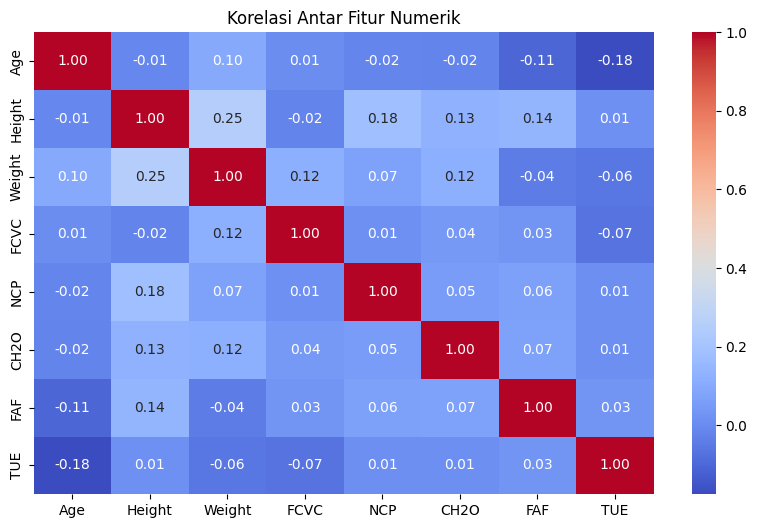

In [ ]:
# Korelasi fitur numerik
fitur_numerik_murni = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

for col in fitur_numerik_murni:
    df[col] = pd.to_numeric(df[col], errors='coerce')

plt.figure(figsize=(10, 6))
sns.heatmap(df[fitur_numerik_murni].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik")
plt.show()

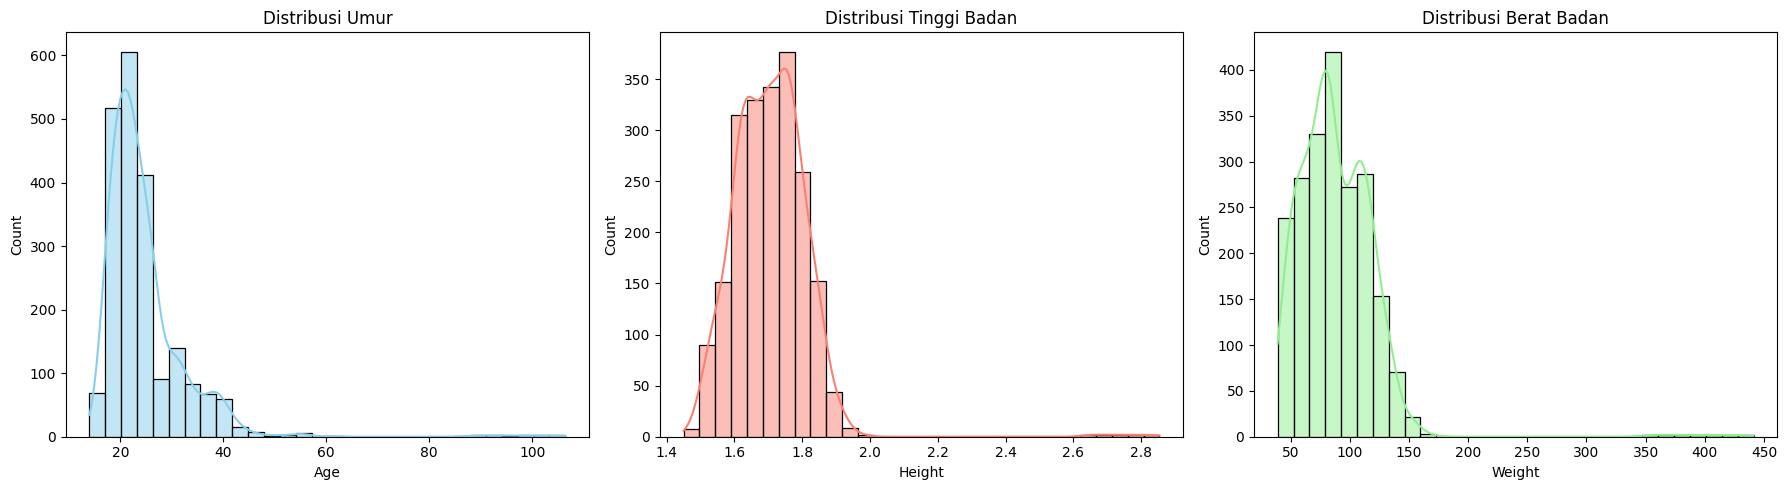

In [ ]:
# Histogram untuk Usia, Tinggi, dan Berat
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Age'], kde=True, bins=30, ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Umur')
sns.histplot(df['Height'], kde=True, bins=30, ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Tinggi Badan')
sns.histplot(df['Weight'], kde=True, bins=30, ax=axes[2], color='lightgreen')
axes[2].set_title('Distribusi Berat Badan')
plt.tight_layout()
plt.show()

In [ ]:
# Definisikan kolom numerik
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

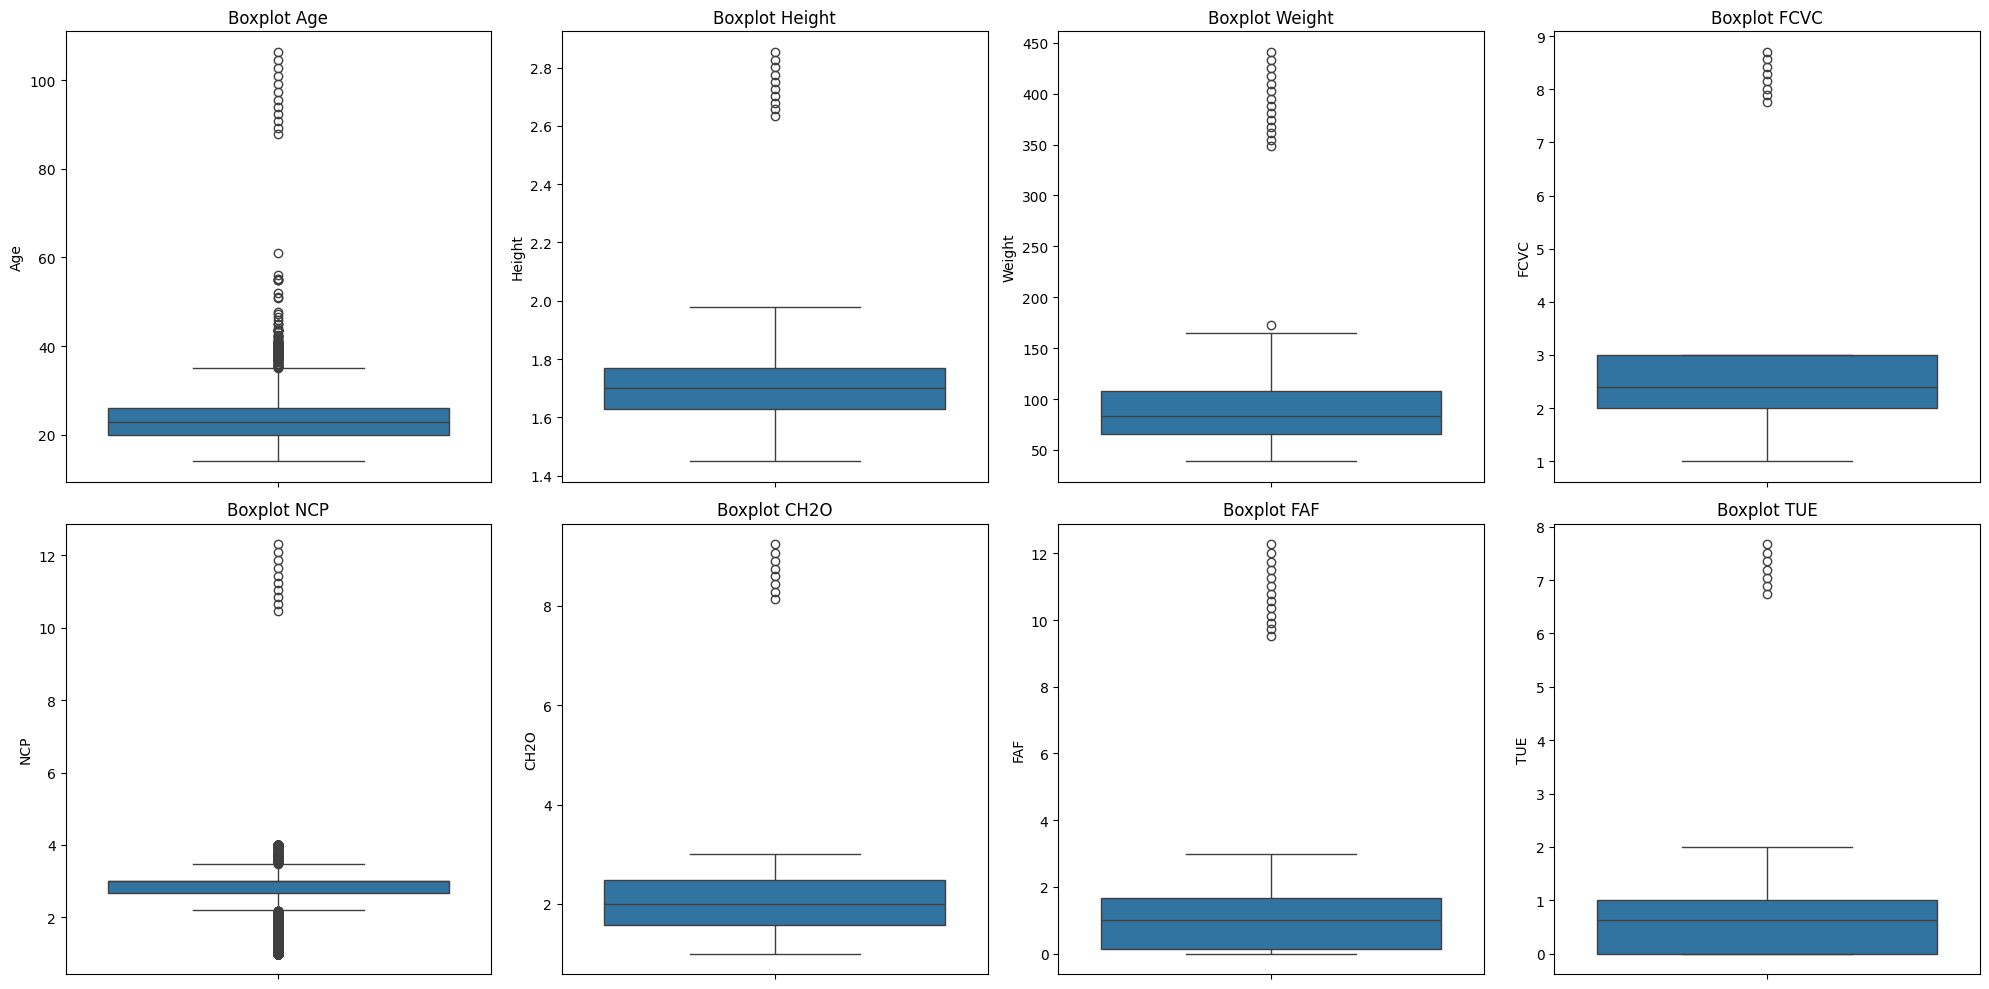

In [ ]:
# Boxplot Deteksi Outlier
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i//4][i%4])
    axes[i//4][i%4].set_title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

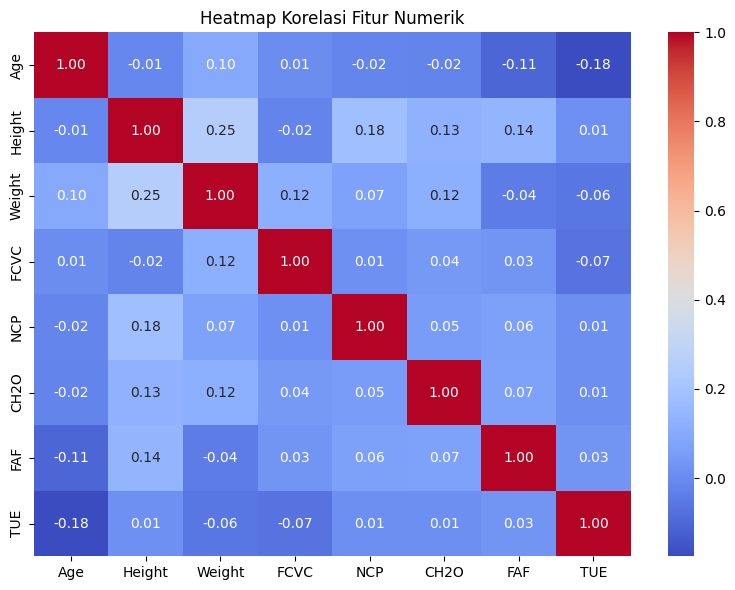

In [ ]:
# Heatmap Korelasi antar Fitur Numerik
corr = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.tight_layout()
plt.show()

## **Kesimpulan EDA**

- Terdapat 2111 baris data dan 17 kolom.
- Beberapa kolom memiliki missing values (misalnya: Age, Height, Weight, dll).
- Ditemukan 18 data duplikat.
- Data target (`NObeyesdad`) memiliki distribusi kelas tidak seimbang.
- Banyak outlier pada kolom `Weight`, `FAF`, `TUE`, dll.
- Korelasi tertinggi terdapat antara `Height` dan `Weight`.